<h1>DOUALA PROXY CLEAN DATA VISUALIZATION</h1><hr>

Ce notebook s'inspire du programme <b>Douala Proxy Clean</b> de la <b>Communaute Urbaine de Douala</b> dont l'objectif est d'étendre les services de ramassage d'ordure aux zones non desservies par HYSACAM. Celui-ci mets des bacs à ordures à la disposition d'entreprises en certains endroits de la ville où elles pourront stocker les déchets venant des quartiers difficile d'accès.<br>Les différents tonnages sont générés par un script python et enregistrés dans une fichier excel. Ces données comprennent entre autre les quartiers, arrondissements, divers lieux de stockage.

<b>Importation des différents modules</b>

In [1]:
import pandas as pd
import random

<b>Génération des dates</b><br> Les dates vont du 01/01/2019 au 30/06/2024 et sont générées à l'aide de la fonction <b>date_range</b> de pandas. L'option freq s'assure que seul les jours ouvrables sont générés. Par alleuirs cette fonction retournant les dates en format YYYY:MM:DD HH:MM:SS une manipulation s'avère nécessaire pour en extraire juste la date.

In [2]:
dates_raw = pd.date_range(start='2019-01-01', end='2024-06-30', freq='B')
dates = []

for i in range(len(dates_raw)-1):
    dates.append(str(dates_raw[i]).split(' ')[0])

<b>Génération des statistiques</b><br> Le module pandas va extraire la liste des arrondissemnts, quartiers, lieux, équipes, positions GPS à partier du fichier 'dpc-sites-stockages.xlsx', en créer un DataFrame en y incluant des tonnages générés par la fonction <b>random</b>.

In [4]:
quartiers = pd.read_excel('quartiers-douala.xlsx')

data = []
for i in range(len(dates)-1):
    for index,q in quartiers.iterrows():
        data.append([dates[i],
             q['Arrondissement'],
             q['Quartier'],
             q['Equipe'],
             int(10*random.random())
            ])
tonnage_journalier = pd.DataFrame(data, columns=['Date','Arrondissement','Quartier','Equipe','Tonnage'])

<b>Appercu du DataFrame contenant des données</b>

In [5]:
tonnage_journalier.head(10)

,Date,Arrondissement,Quartier,Equipe,Tonnage
0,2019-01-01,Douala I,Akwa,DLA1EQ1,5
1,2019-01-01,Douala I,Akawa Nord,DLA1EQ2,5
2,2019-01-01,Douala I,Bessengue,DLA1EQ1,7
3,2019-01-01,Douala I,Bonadibong,DLA1EQ3,6
4,2019-01-01,Douala I,Bonapriso,DLA1EQ4,4
5,2019-01-01,Douala I,Deido,DLA1EQ2,5
6,2019-01-01,Douala I,Essengue,DLA1EQ4,7
7,2019-01-01,Douala I,Ngodi,DLA1EQ4,0
8,2019-01-01,Douala II,Babylone,DLA2EQ2,2
9,2019-01-01,Douala II,Kassalafam,DLA2EQ3,1


<b>Sauveguarde des données</b><br> Les données sont sauveguardées dans un fichier excel avec la fonction <b>ExcelWriter</b> de pandas.

In [9]:
writer = pd.ExcelWriter('ramasage_ordures_stats.xlsx')
tonnage_journalier.to_excel(writer,'sheet1')
writer.save()

<b>Visualisation</b><br>Une fois les données sauveguardées, celle peuvent être visualisées à l'aide d'un <b>Tableau Croisé Dynamique</b> après avoir toutefois subit un pré-traitement puisque la colonne <b>Date</b> n'est pas au format adéquat.<br>Pour cela il faut remplacer - par / et sélectionner 'Date courte' comme format pour la colonne.

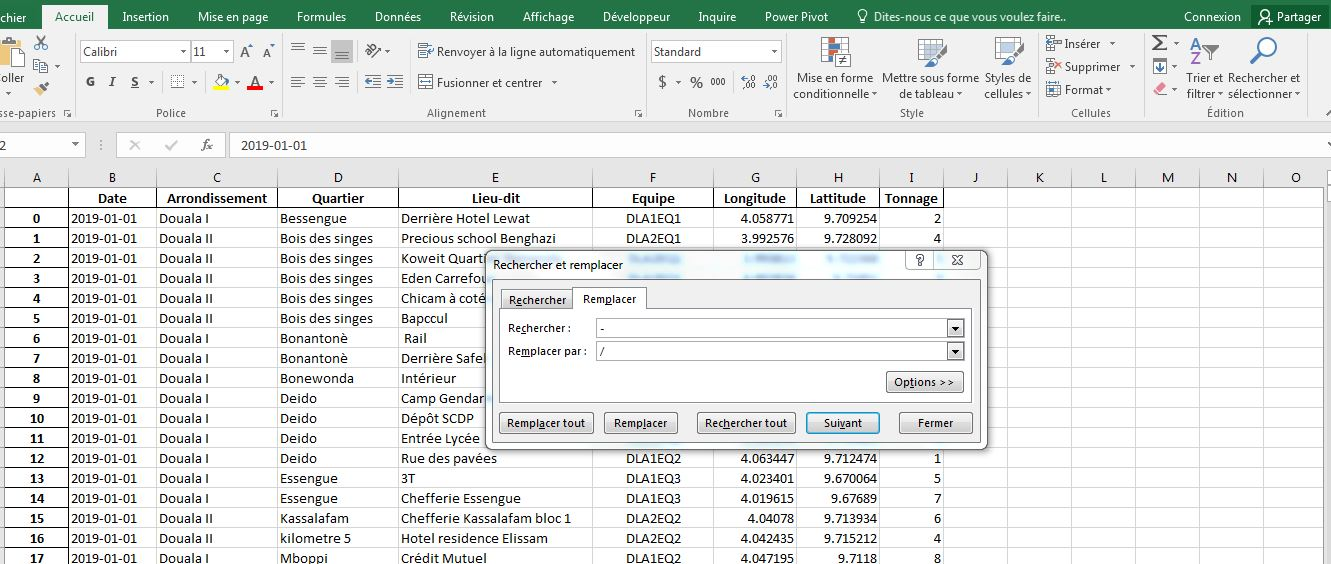

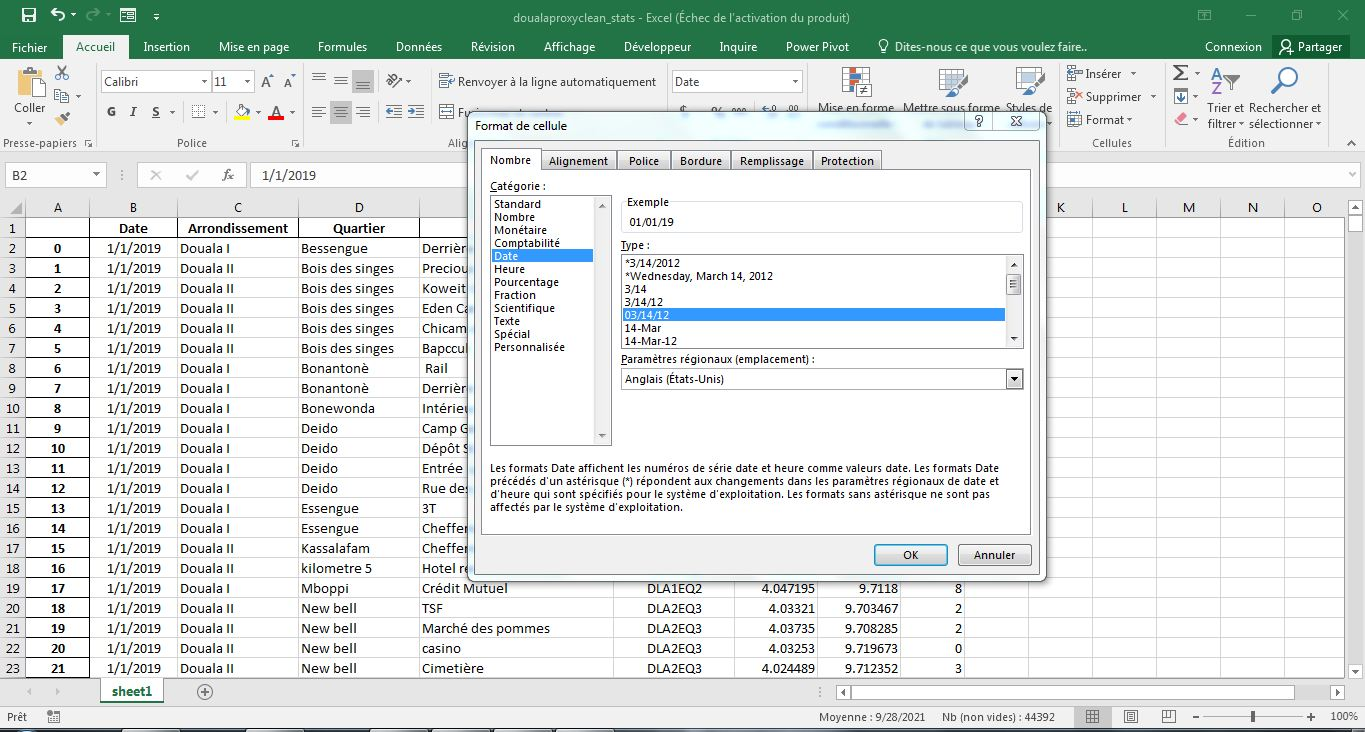

Voici à quoi ressemble le tableau de bord finale

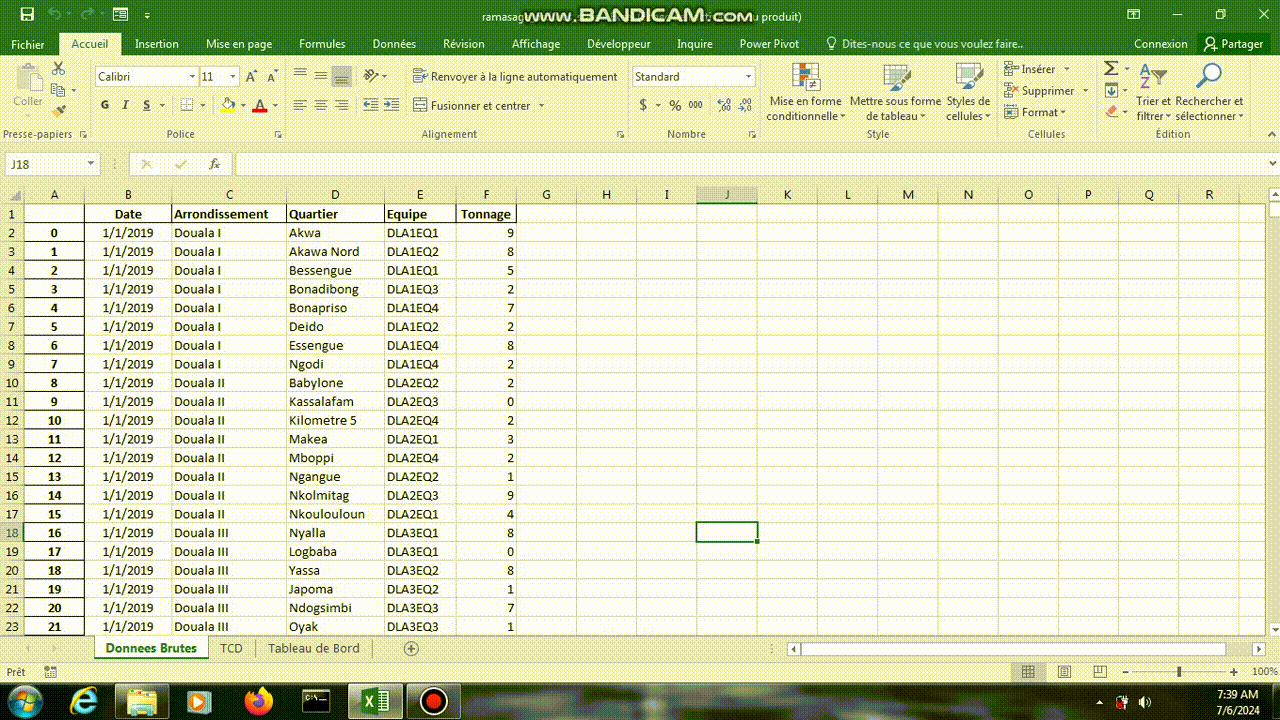

On peut tout aussi bien sauveguarder ces données dans un SGBD comme MySQL (Load) complétant ainsi une boucle ETL après avoir chargé un fichier excel (Extract) et ajouté une colonne (Transform).<br>Par exemple si on a une base de données 'DoualaPropre' avec une table 'Statistiques' contenant les mêmes champs que le fichier 'ramasage_ordures_stats.xlsx', le script de sauveguarde ressemblera à ceci:

In [ ]:
# Le module mysql-connector est nécessaire pour établir la liaison avec MySQL
import mysql.connector

#Initialisation de la connexion à MySQL
cnx = mysql.connector.connect(user='username',password='password', database='DoualaPropre')
cursor = cnx.cursor()

query = ("INSERT INTO Statistiques "
               "(Date,Arrondissement,Quartier,Equipe,Tonnage) "
               "VALUES (%s,%s,%s,%s,%s)")

data = (7/6/2024, 'Douala I','Akwa Nord','DLA1EQ2',5)

#Exécution de la requête
cursor.execute(query, data)
cnx.commit()

#Déconnexion
cursor.close()
cnx.close()